In [1]:
import sklearn
import string
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv("../datasets/iris.csv")

In [3]:
iris_df.columns

Index(['sepal-length  ', 'sepal-width  ', 'petal-length  ', 'petal-width',
       'class'],
      dtype='object')

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.isna().sum()

sepal-length      0
sepal-width       0
petal-length      0
petal-width       0
class             0
dtype: int64

In [6]:
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
121,5.6,2.8,4.9,2.0,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica


In [8]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

machine-learning algorithms can only work with numeric data, so when you have categorical values such as the string labels, we need to convert them to a numeric form, and we'll do this using scikit-learns' label_encoder.

In [10]:
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.6,2.5,3.9,1.1,Iris-versicolor
1,6.3,3.3,6.0,2.5,Iris-virginica
2,6.8,3.2,5.9,2.3,Iris-virginica
3,5.1,3.4,1.5,0.2,Iris-setosa
4,7.7,2.6,6.9,2.3,Iris-virginica


In [11]:
from sklearn.preprocessing import LabelEncoder

iris_df['class'] = LabelEncoder().fit_transform(iris_df['class'].astype(str))

In [12]:
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.6,2.5,3.9,1.1,1
1,6.3,3.3,6.0,2.5,2
2,6.8,3.2,5.9,2.3,2
3,5.1,3.4,1.5,0.2,0
4,7.7,2.6,6.9,2.3,2


In [13]:
iris_df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [14]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
iris_df.columns = iris_df.columns.str.rstrip().str.replace('-','_')

In [16]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

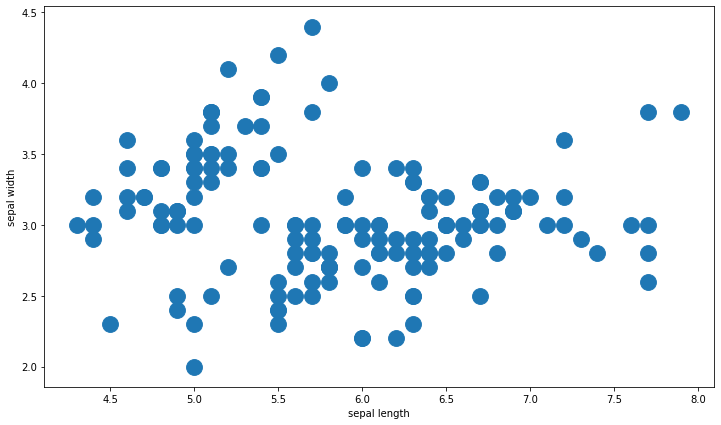

In [17]:
fig,ax = plt.subplots(figsize=(12,7))

plt.scatter(iris_df['sepal_length'],iris_df['sepal_width'],s=250)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

Observe that the clusters in this visualization are not really that obvious

scatter plot of the petal-width of iris flowers versus the petal-length.

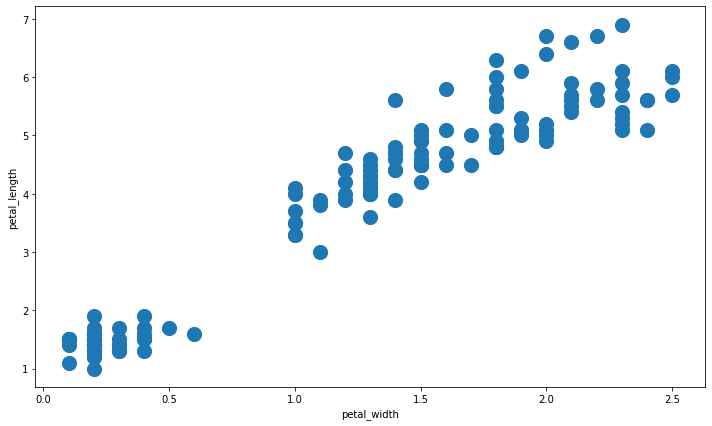

In [23]:
fig,ax = plt.subplots(figsize=(12,7))

plt.scatter(iris_df['petal_width'],iris_df['petal_length'],s=200)
plt.xlabel('petal_width')
plt.ylabel('petal_length')

plt.show()            

You can see that this graph here is a little more interesting. There are some iris flowers that are rather small, small petal lengths and small petal widths, and others with larger petal lengths and widths. Clusters on this data might be a little more easy to visualize. Let's look at a slightly-different visualization here, 

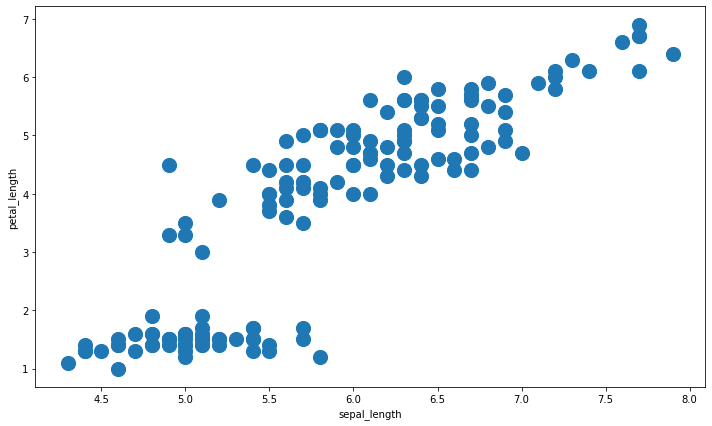

In [25]:
fig,ax = plt.subplots(figsize=(12,7))

plt.scatter(iris_df['sepal_length'],iris_df['petal_length'],s=200)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

plt.show()  

sepal-length versus petal-length. And interestingly enough, if you visualize these two features together, you'll find that the clusters are much more obvious. There are obvious groupings in flowers, we don't whether they belong to the same category or not, but there are clearly clusters available for us to form.

### K-Means

Let's first select two features to perform our clustering, and then we'll move on to including all of the features from the iris dataset.

In [26]:
iris_2d = iris_df[['sepal_length','petal_length']]
iris_2d.sample(5)

,sepal_length,petal_length
69,5.4,1.7
78,5.2,3.9
68,6.4,5.5
26,6.9,5.4
76,6.4,5.6


In [27]:
iris_2d.shape

(150, 2)

Before feeding this into my K-means estimator object, I'll covert it to a NumPy array.

In [28]:
iris_2d = np.array(iris_2d)

Now lets build a Kmeans model

In [29]:
kmeans_2d = KMeans(n_clusters=3,max_iter=1000).fit(iris_2d)

we know that there are three iris flowers, which is why I've specified n_clusters as equal to 3. It's possible that you're working on a dataset in the real world where you don't know what the right number of clusters is, and this is something you'll need to find out using different techniques, including hyperparameter tuning. 

For now, we specify the number of clusters and call fit on our 2 features, iris_2D. 

In [30]:
kmeans_2d.labels_

array([1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1,
       2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2,
       1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0])

Once our K-means estimator has generated clusters in the underlying data, it'll assign labels to every data point based on which cluster it thinks it belongs to. Once again, interpret these labels carefully, the labels assigned by K-means may not match the actual labels in our data. Remember that these labels just represent clusters.

So our original category represented by label 0 might be something different from the category label 0 as generated by our K-means model.

The K-means model would have also set up the cluster centers or the centroids of the three clusters into which it divided our data, and these are the coordinates of the cluster centers. 

In [32]:
centroids_2d = kmeans_2d.cluster_centers_

centroids_2d

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

Cluster center coordinates are not really meaningful until we visualize them, and because we are working with data in two dimensions,  we can visualize this using Matplotlib.

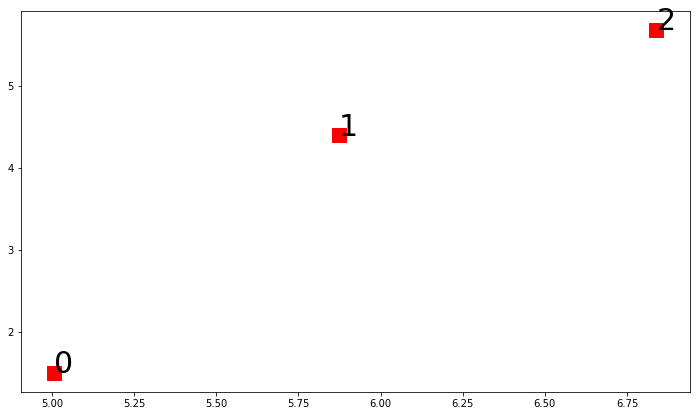

In [34]:
fig,ax = plt.subplots(figsize=(12,7))

plt.scatter(centroids_2d[:,0],centroids_2d[:,1],c='r',s=200,marker='s')
for i in range(len(centroids_2d)):
    plt.annotate(i,(centroids_2d[i][0],centroids_2d[i][1]),fontsize=30)

plt.show()  

Here is a scatter plot of the centroids of the three clusters, and we have  annotated them using the labels from our K-means model. This is a plot with the three cluster centroids clearly annotated. 


Did our K-means model do a good job of clustering the underlying data? Well, we won't know that until we evaluate our clustering using the scores.

In [35]:
iris_labels = iris_df['class']

In [37]:
print("Homogeneity_score         : ", metrics.homogeneity_score(iris_labels, kmeans_2d.labels_))

print("Completeness_score        : ", metrics.completeness_score(iris_labels, kmeans_2d.labels_))

print("v_measure_score           : ", metrics.v_measure_score(iris_labels, kmeans_2d.labels_))

print("Adjusted_rand_score       : ", metrics.adjusted_rand_score(iris_labels, kmeans_2d.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_2d.labels_))

print("Silhouette_score          : ", metrics.silhouette_score(iris_2d, kmeans_2d.labels_))

Homogeneity_score         :  0.7033177646052958
Completeness_score        :  0.7096993707802843
v_measure_score           :  0.706494157075837
Adjusted_rand_score       :  0.6988627672348092
Adjusted_mutual_info_score:  0.6996030957074747
Silhouette_score          :  0.5890612474062568


And here are the various scores, Homogeneity, Completeness, v_measure, Adjusted_rand, and Adjusted-mutual_info scores for our model. When we use just two features to cluster the iris dataset, all of these scores hover around 0.69 and 0.70. These are scores that we get by comparing actual clusters versus the clusters predicted by our K-means clustering model. The Silhouette_score is one score that does not need the actual categories or labels, it's 0.58, which is pretty good. Based on distance, points in one cluster are close to other points in the same cluster and far away from points in other clusters.

Let's visualize the original data points, the original iris flower categories, and the cluster centroids all in a single plot. Here is a scatter plot of the original data points, sepal-length versus petal-length. These data points will be colored yellow, blue, or green based on their iris flower category.

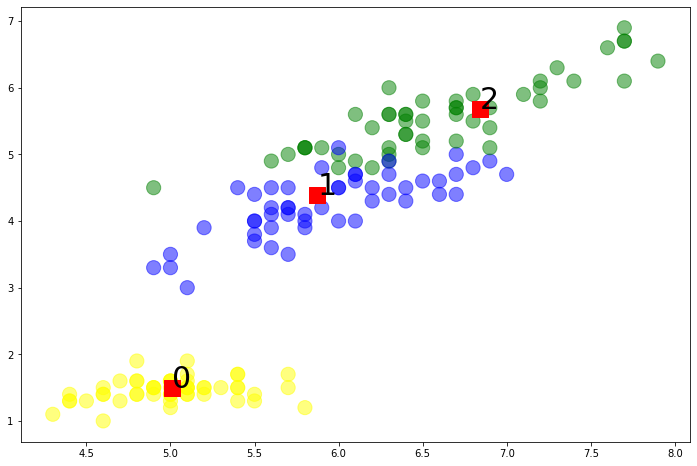

In [41]:
colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(iris_df['sepal_length'], iris_df['petal_length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2d)):
    plt.annotate( i, (centroids_2d[i][0], centroids_2d[i][1]), fontsize=30)

And here is an annotated scatter plot of the centroids that our K-means model found. And here is what the resulting visualization looks like. 


You can see that the clusters are fairly well formed. But we have more information in the iris dataset that we can use to cluster the data. We have four features, we've used just two so far. 

Let's go ahead and drop the class column from the original data frame. We'll now perform clustering using four features, sepal and petal lengths, as well as widths. 

In [42]:
iris_features = iris_df.drop('class',axis = 1)

iris_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.6,2.5,3.9,1.1
1,6.3,3.3,6.0,2.5
2,6.8,3.2,5.9,2.3
3,5.1,3.4,1.5,0.2
4,7.7,2.6,6.9,2.3


Let's get the original categories or the labels into a separate variable. We'll use this to evaluate our clustering model once the clustering has been performed. 

In [43]:
iris_labels = iris_df['class']

iris_labels.sample(5)

73    2
32    0
29    0
46    0
42    1
Name: class, dtype: int32

Instantiate a K-means clustering estimator object, and clusters are still three and call fit on all four iris features.

In [44]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

 Once the model has clustered the underlying data, we can take a look at the labels that it has assigned each data point. 

In [45]:
kmeans_model.labels_

array([0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1,
       1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1])

We can also take a look at the cluster centers or the centroids. Remember that these centroids may not be data points that are part of the original dataset. 

In [46]:
kmeans_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

But was the clustering better now that we had more features to work with? Let's see. Let's go ahead and compute all of the different scores that we can use to evaluate our model. 

In [47]:
print("Homogeneity_score         : ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score        : ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score           : ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted_rand_score       : ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model.labels_))
print("Silhouette_score          : ", metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score         :  0.7514854021988339
Completeness_score        :  0.7649861514489816
v_measure_score           :  0.7581756800057786
Adjusted_rand_score       :  0.7302382722834697
Adjusted_mutual_info_score:  0.7483723933229485
Silhouette_score          :  0.5525919445499755


And here you can see that all of the scores which require the actual labels have improved. The clustering has clearly improved, the scores are around 0.75, as opposed to being around 0.7 earlier. So in this particular situation, adding additional features definitely helped our K-means clustering model perform better. The Silhouette_score has fallen a bit, but it's still in the same range. So overall, our performance has improved thanks to the addition of more features. 